<a href="https://colab.research.google.com/github/jun-wei-lin/NCHU/blob/main/AIoT-DA/HW5%3DDeep%20Lerarning%20basic/Hw5_2_%E6%89%8B%E5%AF%AB%E8%BE%A8%E8%AA%8D_tf_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Dense Model
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7318 - loss: 0.8627 - val_accuracy: 0.9423 - val_loss: 0.1941
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9262 - loss: 0.2444 - val_accuracy: 0.9597 - val_loss: 0.1377
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9464 - loss: 0.1775 - val_accuracy: 0.9644 - val_loss: 0.1165
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9542 - loss: 0.1442 - val_accuracy: 0.9693 - val_loss: 0.1031
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9639 - loss: 0.1182 - val_accuracy: 0.9700 - val_loss: 0.0971
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9687 - loss: 0.1007 - val_accuracy: 0.9741 - val_loss: 0.0901
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9709 - loss: 0.0939 - val_accuracy: 0.9744 - val_loss: 0.0872
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.08

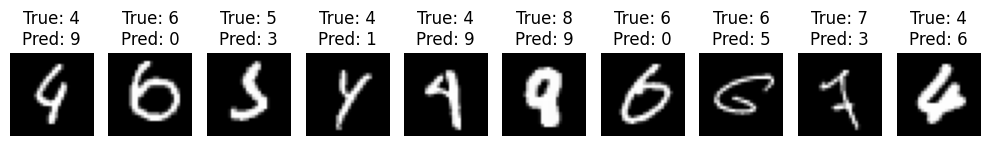

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape images for CNN input
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# DNN Model
def create_dense_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# CNN Model
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create models
dense_model = create_dense_model()
cnn_model = create_cnn_model()

# Train and evaluate the Dense model
print("Training Dense Model")
dense_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
dense_eval = dense_model.evaluate(x_test, y_test, verbose=0)
print(f"Dense Model - Test Loss: {dense_eval[0]}, Test Accuracy: {dense_eval[1]}")

# Train and evaluate the CNN model
print("Training CNN Model")
cnn_model.fit(x_train_cnn, y_train, epochs=10, batch_size=128, validation_split=0.2)
cnn_eval = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"CNN Model - Test Loss: {cnn_eval[0]}, Test Accuracy: {cnn_eval[1]}")

# List and visualize misclassified examples for CNN model
print("Listing misclassified examples")
predictions = cnn_model.predict(x_test_cnn)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

misclassified_indices = np.where(predicted_labels != true_labels)[0]

print(f"Number of misclassified examples: {len(misclassified_indices)}")

# List misclassified examples with details
for idx in misclassified_indices[:10]:
    print(f"Index: {idx}, True Label: {true_labels[idx]}, Predicted Label: {predicted_labels[idx]}")

# Visualize some misclassified examples
num_examples = 10
plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_indices[:num_examples]):
    plt.subplot(1, num_examples, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {true_labels[idx]}\nPred: {predicted_labels[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
